In [2]:
import PyNEC
import n3ox_utils.pynec_helpers as pnh
import n3ox_utils.plot_tools as ptl 
import n3ox_utils.nfanim as nfa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt = ptl.init_pyplot_defaults(plt)

In [4]:
figs = {}

# Wireless Inductive Coupling

This notebook uses PyNEC to simulate the resonant inductive coupling between a pair of octagonal loops and visualizes the power flowing from the source loop to the load loop using the Poynting vector:

$$\vec{P} = \vec{E}\times\vec{B}$$

# Loop Geometry

We start by generating wire dictionaries for each of the wires in two octagonal loops with "radius" `Rl` and separation `sep`.

Each wire is generated programmatically but I'm using the `pynec_helpers.WireInput()` widget UI (**Table 1**) to 
display their 3D coordinates and other properties.

The first wire dictionary is a horizontal wire straddling the z-axis, and rotated and translated copies are made from that dictionary.

The dictionary `wd_params` below contains common parameters for each wire, assigning each one to have 3 segments and a 10mm radius. 

In [5]:
Rl = 0.5 #loop "radius" in meters
thi = np.pi/180.0*22.5 #initial endpoints in meters
wd = {'xw1':0., 'yw1':Rl*np.sin(thi), 'zw1':Rl*np.cos(thi), 
      'xw2':0, 'yw2':Rl*np.sin(-thi), 'zw2':Rl*np.cos(-thi) }

In [6]:
# we define common params for each generated wire
wd_params = {'segment_count':3, 'rad':0.010}


In [7]:
wire_input = pnh.WireInput()
wire_input.delete_all_wires()
angs = np.linspace(0, 360, 8, endpoint=False) # eight 45-deg spaced rotation angles 
sep = 4.0*Rl
# set up sixteen wires, tags 1 to 16, consisting of two octagons separated by sep meters
for tagnum, ang in zip(range(1,17), np.hstack([angs, angs])):
    new_wire = wd.copy()
    new_wire.update(wd_params)
    new_wire['tag_id'] = tagnum
    pnh.rotate_wiredict(new_wire, ang, 'x', inplace=True)
    if tagnum<9:
        pnh.translate_wiredict(new_wire, sep/2, 'x', inplace=True)
    else:
        pnh.translate_wiredict(new_wire, -sep/2, 'x', inplace=True)
    row = wire_input.add_wire_row()
    wire_input.populate_row(row=row, wiredict=new_wire)
wire_input.show()

_**Table 1:** Wire input widget displaying the generated wire coordinates._

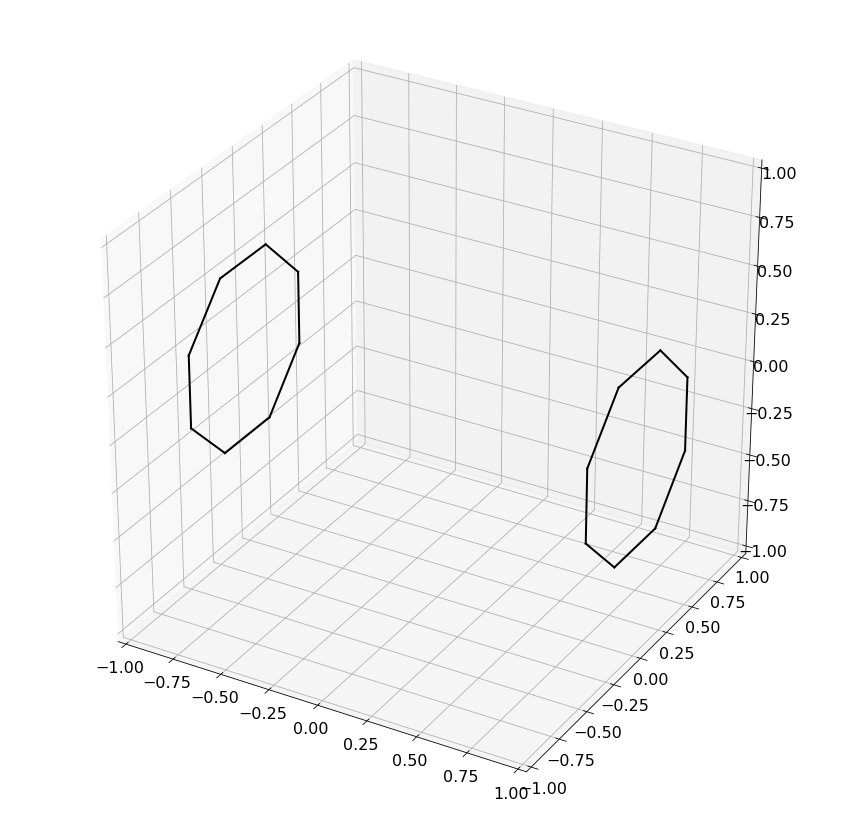

In [10]:
from mpl_toolkits.mplot3d import Axes3D # enables '3d' projection
figs[1] = plt.figure(figsize=(15,15))
figs[1].axa = figs[1].add_subplot(111, projection='3d')

for wd in wire_input.return_wire_dicts():
    p1, p2 = pnh.get_wire_points(wd)
    figs[1].axa.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='k')
    lims = [-1, 1]
    for setlim in [figs[1].axa.set_xlim, figs[1].axa.set_ylim, figs[1].axa.set_zlim]:
        setlim(lims)

_**Figure 1:** 3D geometry of the two coupled loops._